### Wine-Clustering Unsuperwised ML:

In [110]:
# Importing some required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [111]:
# Reading/Loading tha dataset

data = pd.read_csv('wine-clustering (1).csv')

In [112]:
# Visualizing top 5 records of dataset

data.head()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     OD280  Proline  
0     3.92     1065  
1     3.40     1050  
2     3.17     1185  
3     3.45     1480  
4     2.93      735  
..     ...      ...  
173   1.74      740  
174   1.56      750  
175   1.56      835  
176   1.62      840  
177   1.60      560  

[178 rows x 13 columns]

In [113]:
# .5 summary of the dataset

data.describe().T

count        mean         std     min       25%  \
Alcohol               178.0   13.000618    0.811827   11.03   12.3625   
Malic_Acid            178.0    2.336348    1.117146    0.74    1.6025   
Ash                   178.0    2.366517    0.274344    1.36    2.2100   
Ash_Alcanity          178.0   19.494944    3.339564   10.60   17.2000   
Magnesium             178.0   99.741573   14.282484   70.00   88.0000   
Total_Phenols         178.0    2.295112    0.625851    0.98    1.7425   
Flavanoids            178.0    2.029270    0.998859    0.34    1.2050   
Nonflavanoid_Phenols  178.0    0.361854    0.124453    0.13    0.2700   
Proanthocyanins       178.0    1.590899    0.572359    0.41    1.2500   
Color_Intensity       178.0    5.058090    2.318286    1.28    3.2200   
Hue                   178.0    0.957449    0.228572    0.48    0.7825   
OD280                 178.0    2.611685    0.709990    1.27    1.9375   
Proline               178.0  746.893258  314.907474  278.00  500.5000   

                          50%       75%      max  
Alcohol                13.050   13.6775    14.83  
Malic_Acid              1.865    3.0825     5.80  
Ash                     2.360    2.5575     3.23  
Ash_Alcanity           19.500   21.5000    30.00  
Magnesium              98.000  107.0000   162.00  
Total_Phenols           2.355    2.8000     3.88  
Flavanoids              2.135    2.8750     5.08  
Nonflavanoid_Phenols    0.340    0.4375     0.66  
Proanthocyanins         1.555    1.9500     3.58  
Color_Intensity         4.690    6.2000    13.00  
Hue                     0.965    1.1200     1.71  
OD280                   2.780    3.1700     4.00  
Proline               673.500  985.0000  1680.00

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


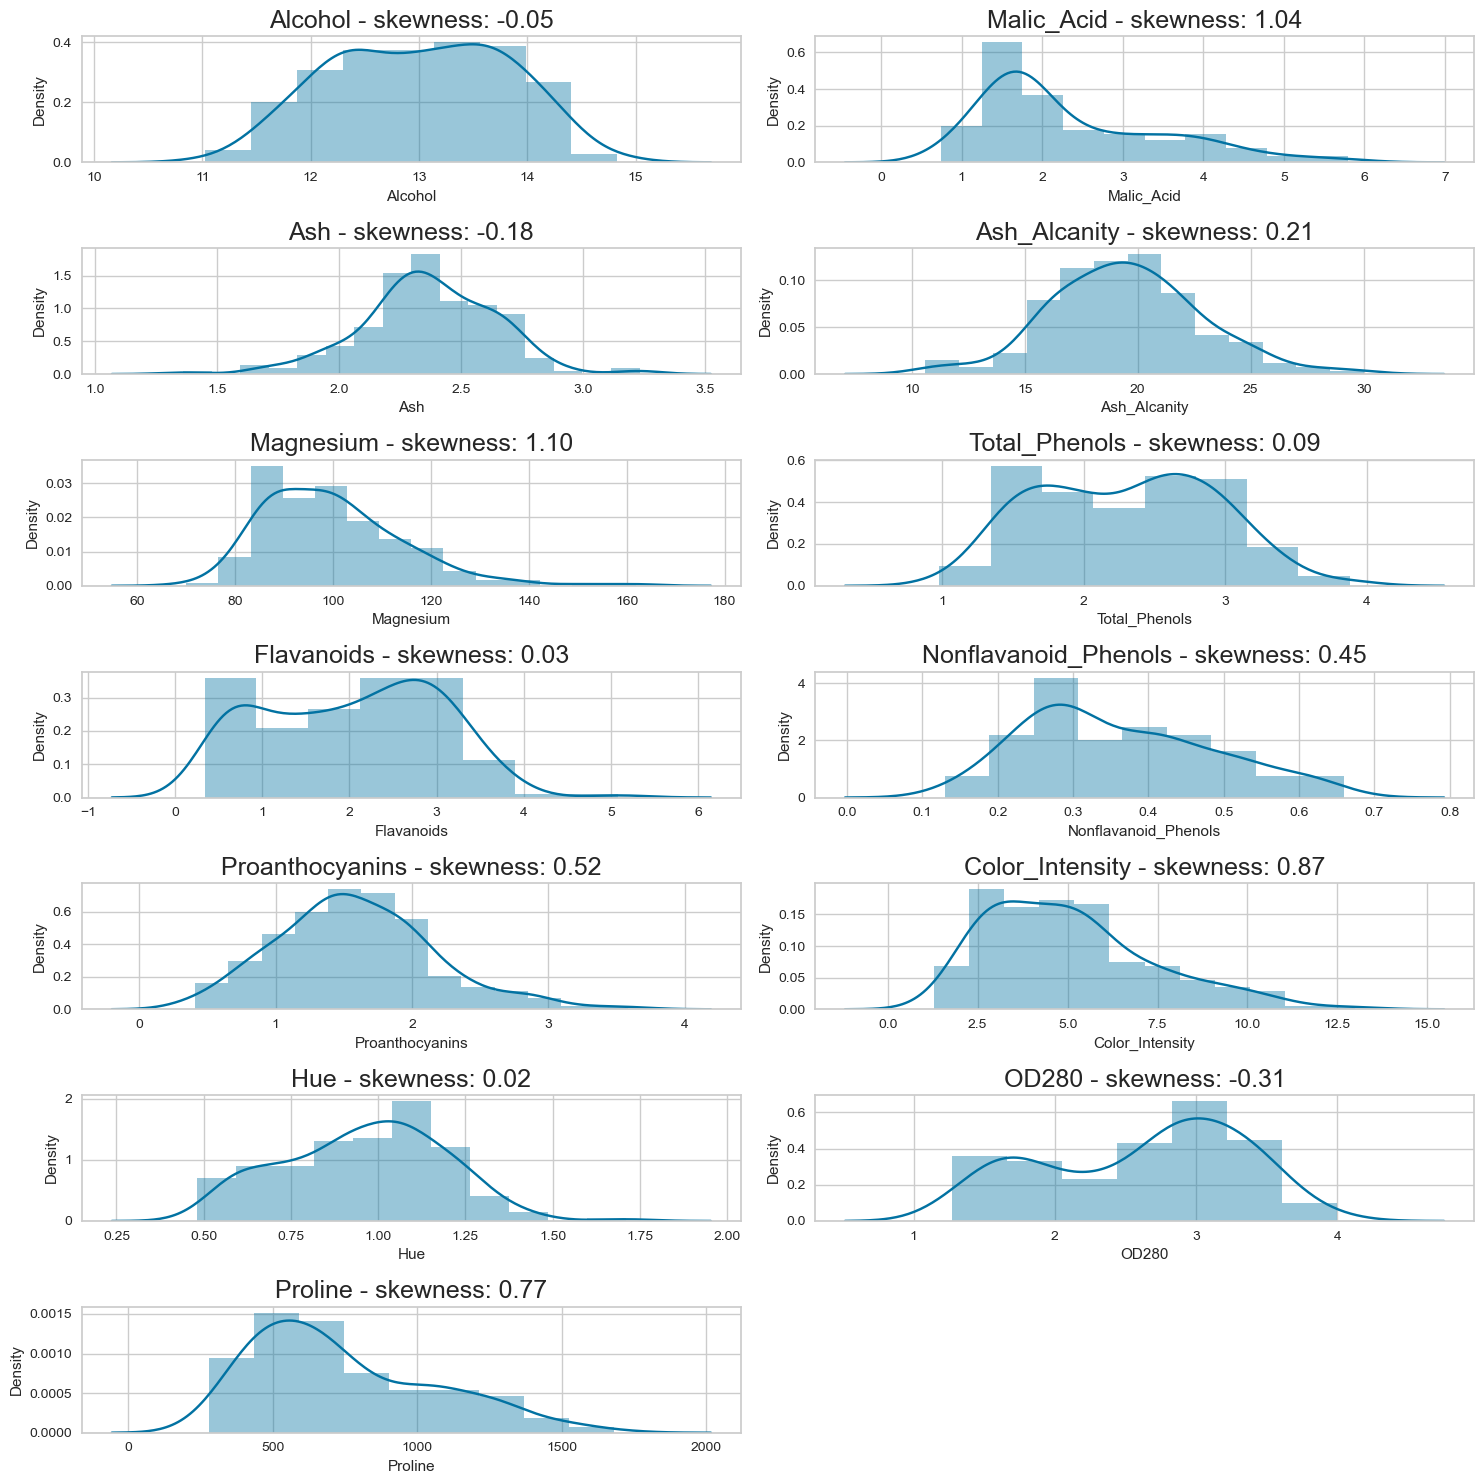

In [115]:
t = 1
plt.figure(figsize=(15,15))
for i in data.columns:
    plt.subplot(7,2,t)
    sns.distplot(data[i])
    plt.title('%s - skewness: %.2f'%(i,data[i].skew()),fontsize=18)
    t+=1
plt.tight_layout()

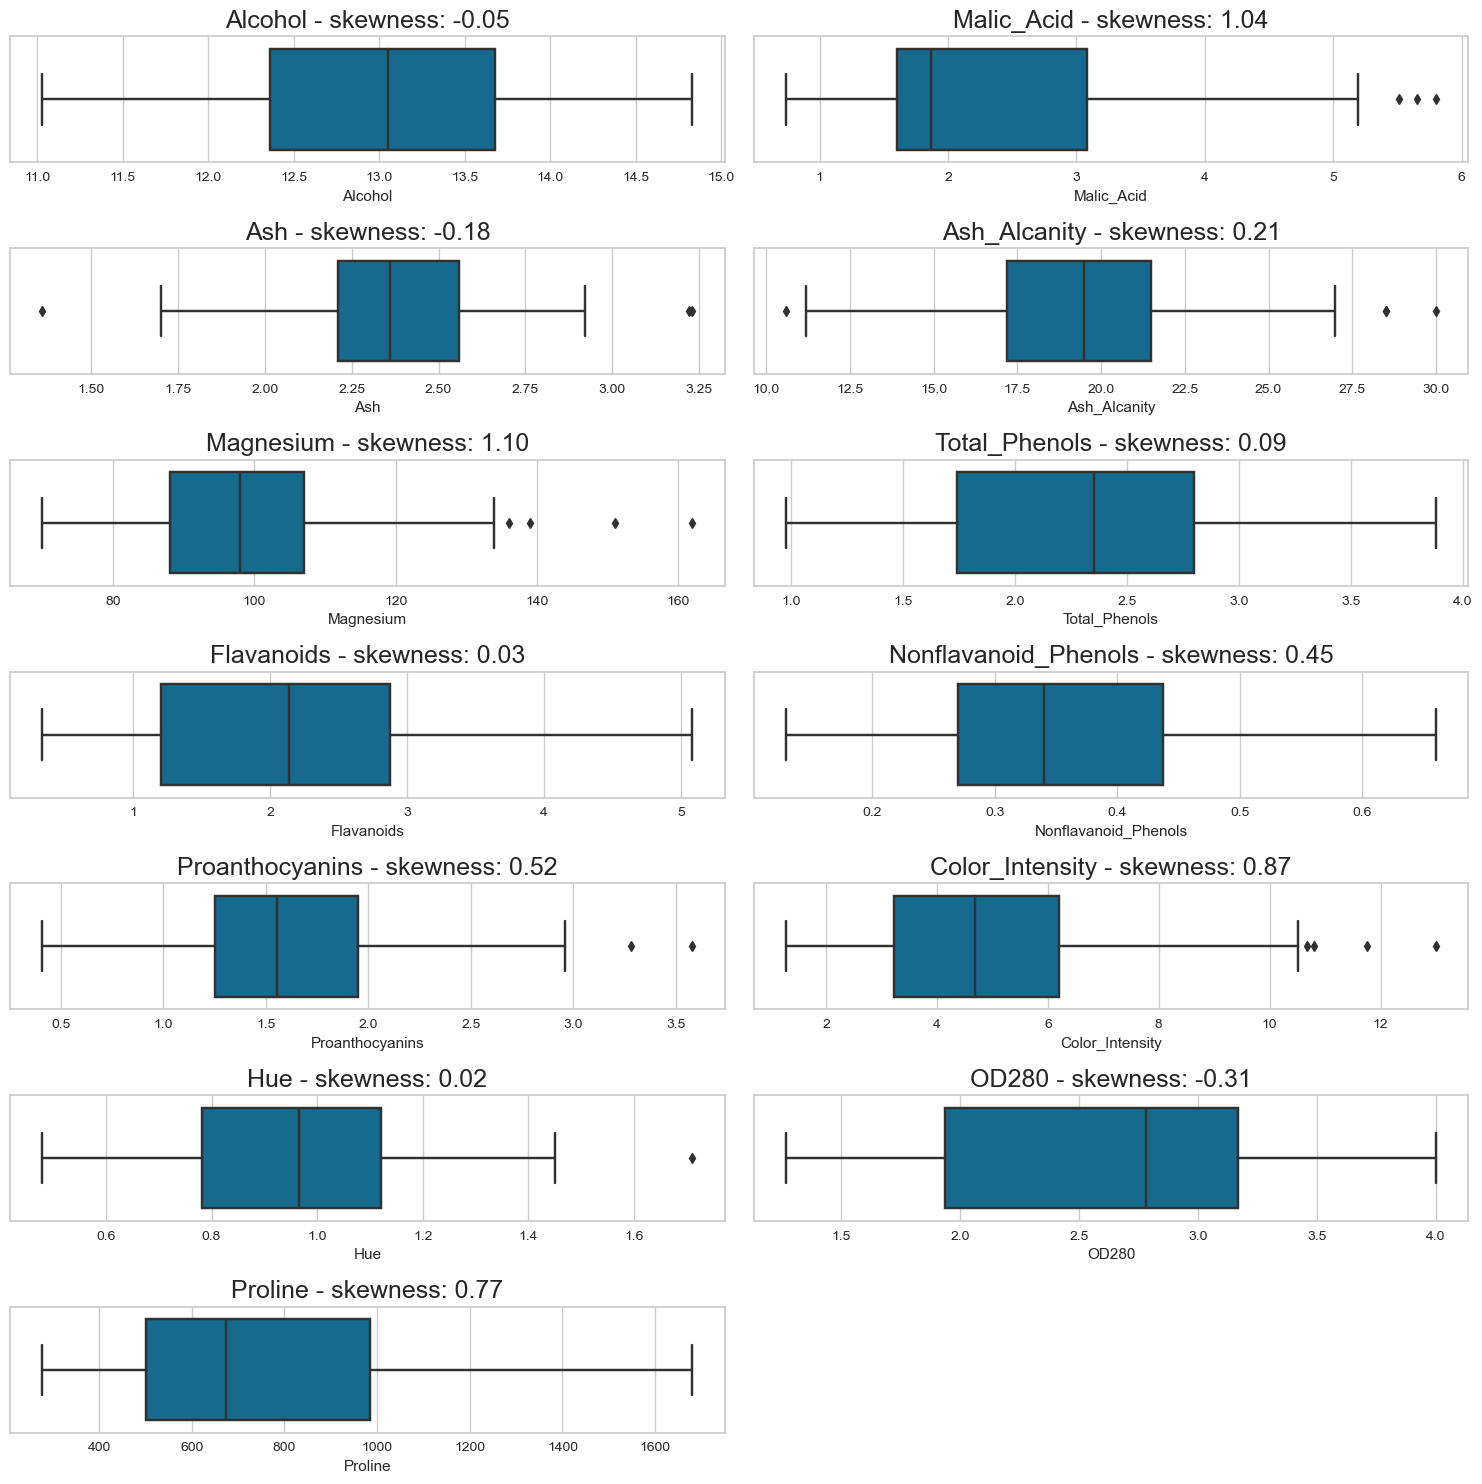

In [116]:
t = 1
plt.figure(figsize=(15,15))
for i in data.columns:
    plt.subplot(7,2,t)
    sns.boxplot(data[i])
    plt.title('%s - skewness: %.2f'%(i,data[i].skew()),fontsize=18)
    t+=1
plt.tight_layout()

In [117]:
# Lets perform yeo_jhonson tranformation
from sklearn.preprocessing import power_transform

In [118]:
# Applyong the power_transformation

for i in data.columns:
    data[i] = power_transform(pd.DataFrame(data[i]))

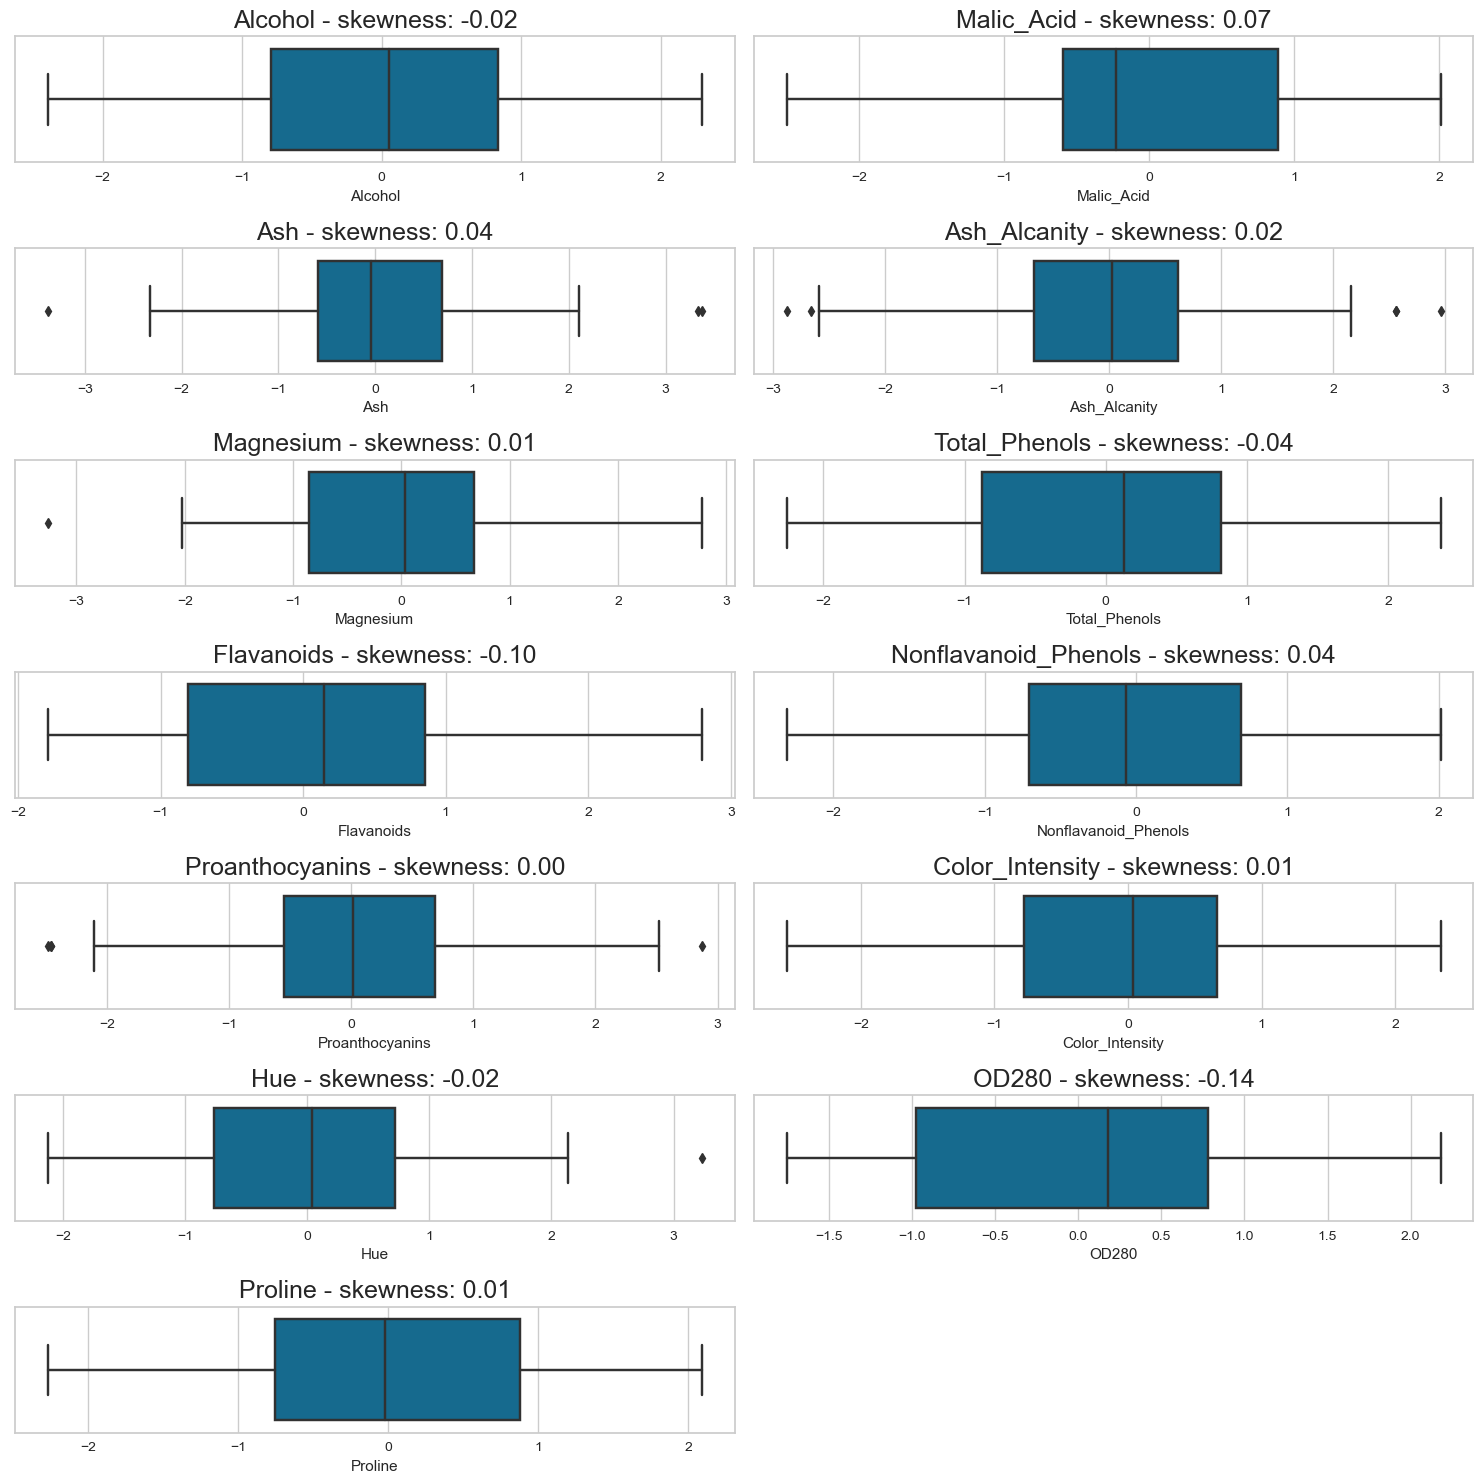

In [119]:
t = 1
plt.figure(figsize=(15,15))
for i in data.columns:
    plt.subplot(7,2,t)
    sns.boxplot(data[i])
    plt.title('%s - skewness: %.2f'%(i,data[i].skew()),fontsize=18)
    t+=1
plt.tight_layout()

In [120]:
data

Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    1.530388   -0.435463  0.210464     -1.180400   1.690749       0.819950   
1    0.238381   -0.338701 -0.839064     -2.663167   0.188126       0.591646   
2    0.188751    0.318077  1.119290     -0.243437   0.261461       0.819950   
3    1.708049   -0.121469  0.471827     -0.799464   1.020463       2.331036   
4    0.288052    0.523699  1.903702      0.472612   1.282104       0.819950   
..        ...         ...       ...           ...        ...            ...   
173  0.874761    1.971560  0.284824      0.325633  -0.206899      -0.983143   
174  0.487148    1.353424  0.396838      1.049949   0.333054      -0.777669   
175  0.325332    1.516324 -0.411341      0.177532   1.379377      -1.139573   
176  0.201155    0.523699 -0.011100      0.177532   1.379377      -1.035059   
177  1.403783    1.439809  1.391069      1.472657  -0.123889      -0.360140   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
0      1.027153             -0.609851         1.202701         0.451450   
1      0.747647             -0.806373        -0.490487        -0.110974   
2      1.192395             -0.421141         1.925646         0.467301   
3      1.419054             -1.011162         1.038972         1.182895   
4      0.681647              0.342097         0.471707        -0.141340   
..          ...                   ...              ...              ...   
173   -1.469686              1.242295        -0.931816         1.153680   
174   -1.308946              0.641775        -0.244461         1.032950   
175   -1.377430              0.641775        -0.356749         1.790358   
176   -1.388902              1.303401        -0.152471         1.581288   
177   -1.297589              1.480646        -0.356749         1.556806   

          Hue     OD280   Proline  
0    0.368811  2.037232  1.062541  
1    0.412391  1.150327  1.029743  
2    0.325202  0.779080  1.307868  
3   -0.420745  1.232761  1.810007  
4    0.368811  0.405810  0.188985  
..        ...       ...       ...  
173 -1.400065 -1.221001  0.205257  
174 -1.131304 -1.432767  0.237441  
175 -1.625052 -1.432767  0.493246  
176 -1.579979 -1.363232  0.507388  
177 -1.534944 -1.386528 -0.473166  

[178 rows x 13 columns]

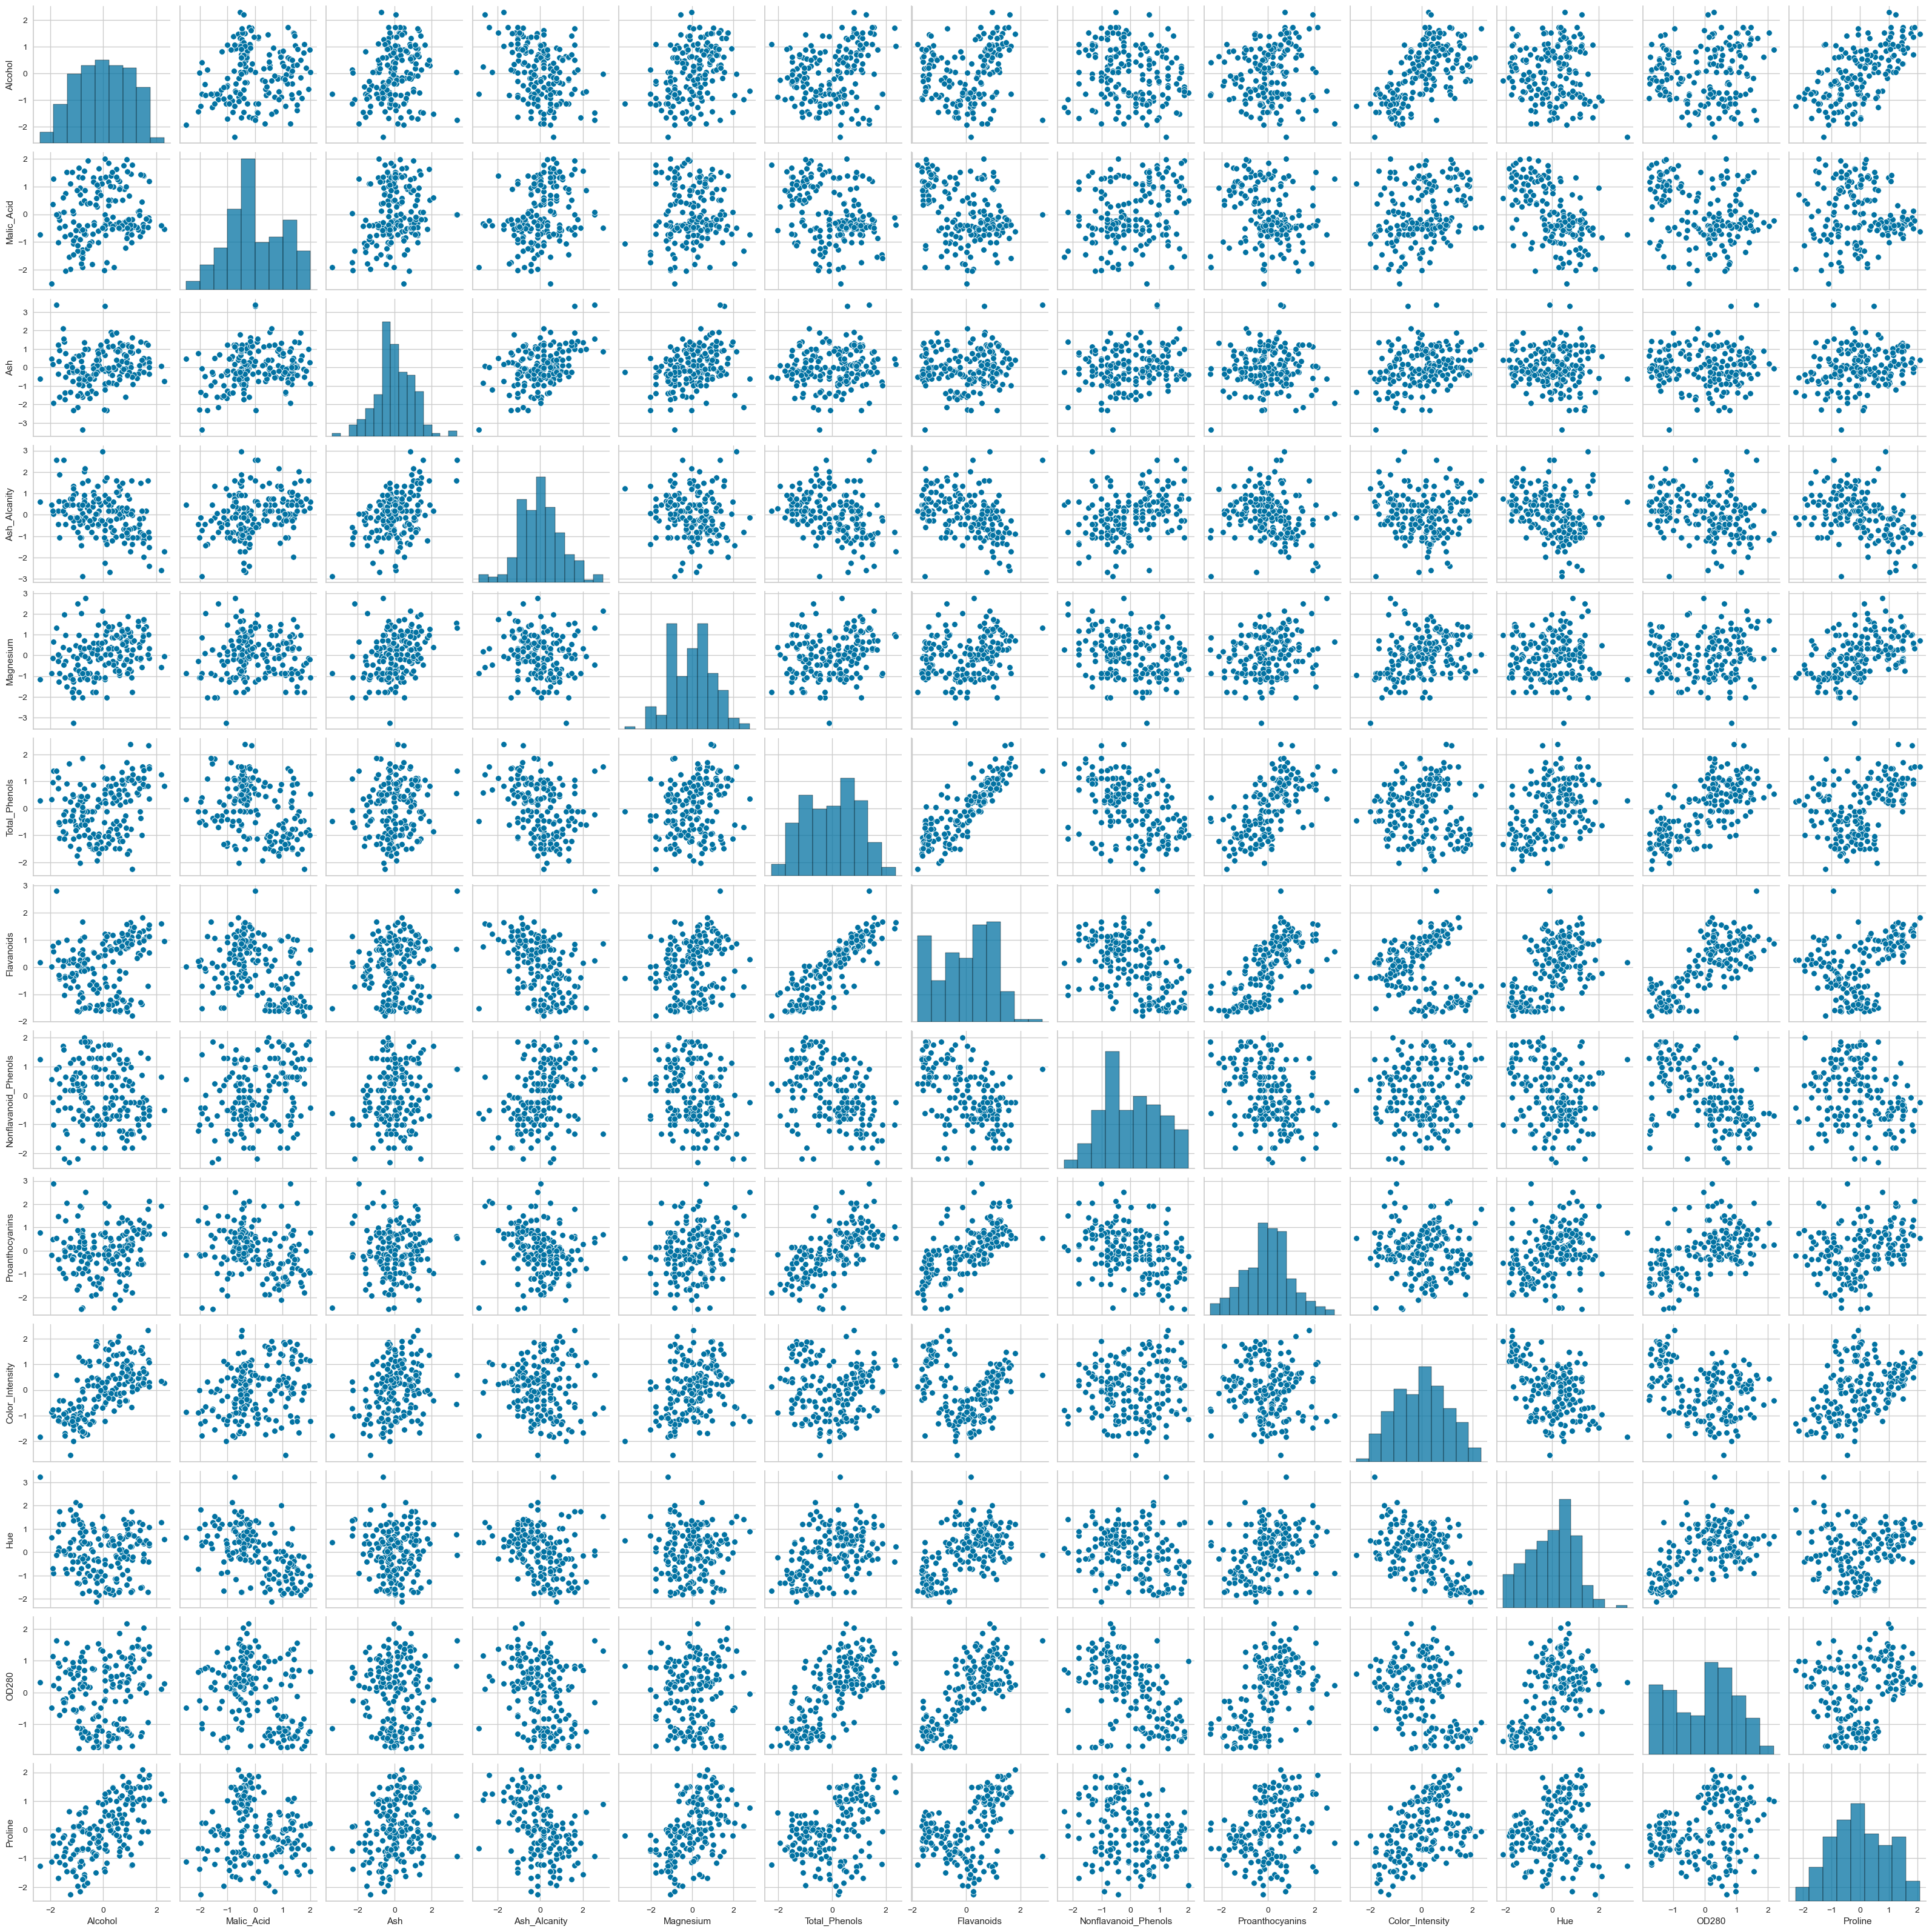

In [121]:
sns.pairplot(data)

In [122]:
# Lets reduce the dimensionality of the data by performing PCA and LDA

In [123]:
cov_mat = np.cov(data.T)

In [124]:
cov_mat.shape

(13, 13)

In [125]:
eig_val, eig_vec = np.linalg.eig(cov_mat)

In [126]:
eig_val

array([4.58785399, 2.74596918, 1.48601054, 0.91151485, 0.80917369,
       0.59963916, 0.51709263, 0.10160612, 0.36353423, 0.16659966,
       0.31189094, 0.2500397 , 0.22252162])

In [127]:
eig_vec

array([[ 0.15298815,  0.45476476,  0.19404836, -0.00742656, -0.30308899,
         0.16039822, -0.19579761,  0.04595019,  0.25886317, -0.2662183 ,
        -0.57666925,  0.24321607, -0.21083468],
       [-0.22325282,  0.26665543, -0.16656644, -0.52092766, -0.00751511,
         0.5927141 ,  0.31295874, -0.00828338,  0.05104485,  0.05287764,
        -0.03238459, -0.29729342,  0.18902653],
       [ 0.00249122,  0.30182916, -0.61508905,  0.27450202, -0.06005818,
         0.09095886, -0.21057466, -0.12987749, -0.11113982, -0.14124799,
         0.22015698, -0.27351862, -0.4759539 ],
       [-0.24571233, -0.01887899, -0.60110552, -0.03395941,  0.07519356,
        -0.19048749, -0.26960887,  0.1163736 ,  0.37604312,  0.04204998,
        -0.17380297,  0.27153381,  0.44888966],
       [ 0.14614977,  0.34184461, -0.10105442,  0.27474899,  0.68386298,
         0.02071281,  0.38347047,  0.03731311, -0.2016043 ,  0.07677533,
        -0.25193214,  0.22114584,  0.02509975],
       [ 0.40421188,  0.037069

In [128]:
eig_vec.shape

(13, 13)

In [129]:
# 178 X 13  * 13 * 13 = 178 X 13

In [130]:
data_pc = np.dot(data,eig_vec)

In [131]:
data_pc = pd.DataFrame(data_pc,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7',
                                        'PC8','PC9','PC10','PC11','PC12','PC13'])

In [132]:
data_pc

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    3.350156  1.474457  0.198431 -0.013188  0.274681  0.352221  0.454845   
1    2.263615 -0.094033  2.114921  0.133045 -0.011339  1.147916  0.099525   
2    2.362854  1.142488 -1.096692 -0.545426 -0.344877 -0.319163  0.558113   
3    3.581107  2.512494  0.057693 -0.682417 -0.277391 -0.167650 -0.379155   
4    0.997288  1.137732 -2.079533  0.488557  0.197394  0.415051  0.451463   
..        ...       ...       ...       ...       ...       ...       ...   
173 -3.003393  2.197966  0.346875 -0.508565 -0.673280  0.631497  0.321074   
174 -2.453062  1.964700 -0.266735 -0.319189  0.140748 -0.193400  0.264495   
175 -2.478677  2.676602  0.853649 -0.431062  0.897899 -0.282880  0.935089   
176 -2.316494  2.372787  0.548003  0.321368  0.520463 -0.893990  1.052742   
177 -2.926118  2.680594 -1.109863 -0.409829 -0.998200 -0.403514 -0.219727   

          PC8       PC9      PC10      PC11      PC12      PC13  
0   -0.202723 -0.088320  0.602944 -0.364678  1.004567 -0.771226  
1   -0.029535 -0.893737  0.260858  0.682022 -0.034269 -0.290030  
2    0.029039  0.484957  0.088453  0.828938 -0.457896 -0.277318  
3   -0.233839 -0.584629 -0.290025  0.145210  0.497351  0.391054  
4   -0.048370 -0.439872 -0.245070 -0.235713 -0.153984 -0.281056  
..        ...       ...       ...       ...       ...       ...  
173 -0.171298  0.100782 -0.051631 -0.026529  0.002278  0.126661  
174 -0.177971  0.536984 -0.212398 -0.079129 -0.049305  0.366133  
175 -0.030859  0.034357  0.455597  0.043375  0.174356  0.400837  
176 -0.086245 -0.185445  0.303608  0.207138  0.572620  0.034256  
177 -0.369587  0.027256 -0.333337 -0.777429  0.065978 -0.098209  

[178 rows x 13 columns]

In [133]:
# using PCA from sklearn

In [134]:
from sklearn.decomposition import PCA

In [135]:
pca = PCA(n_components=13)

In [136]:
data_pca = pca.fit_transform(data)

In [137]:
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7',
                                        'PC8','PC9','PC10','PC11','PC12','PC13'])

In [138]:
data_pca

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0   -3.350156 -1.474457 -0.198431  0.013188  0.274681 -0.352221  0.454845   
1   -2.263615  0.094033 -2.114921 -0.133045 -0.011339 -1.147916  0.099525   
2   -2.362854 -1.142488  1.096692  0.545426 -0.344877  0.319163  0.558113   
3   -3.581107 -2.512494 -0.057693  0.682417 -0.277391  0.167650 -0.379155   
4   -0.997288 -1.137732  2.079533 -0.488557  0.197394 -0.415051  0.451463   
..        ...       ...       ...       ...       ...       ...       ...   
173  3.003393 -2.197966 -0.346875  0.508565 -0.673280 -0.631497  0.321074   
174  2.453062 -1.964700  0.266735  0.319189  0.140748  0.193400  0.264495   
175  2.478677 -2.676602 -0.853649  0.431062  0.897899  0.282880  0.935089   
176  2.316494 -2.372787 -0.548003 -0.321368  0.520463  0.893990  1.052742   
177  2.926118 -2.680594  1.109863  0.409829 -0.998200  0.403514 -0.219727   

          PC8       PC9      PC10      PC11      PC12      PC13  
0    0.088320  0.364678 -1.004567 -0.771226  0.602944 -0.202723  
1    0.893737 -0.682022  0.034269 -0.290030  0.260858 -0.029535  
2   -0.484957 -0.828938  0.457896 -0.277318  0.088453  0.029039  
3    0.584629 -0.145210 -0.497351  0.391054 -0.290025 -0.233839  
4    0.439872  0.235713  0.153984 -0.281056 -0.245070 -0.048370  
..        ...       ...       ...       ...       ...       ...  
173 -0.100782  0.026529 -0.002278  0.126661 -0.051631 -0.171298  
174 -0.536984  0.079129  0.049305  0.366133 -0.212398 -0.177971  
175 -0.034357 -0.043375 -0.174356  0.400837  0.455597 -0.030859  
176  0.185445 -0.207138 -0.572620  0.034256  0.303608 -0.086245  
177 -0.027256  0.777429 -0.065978 -0.098209 -0.333337 -0.369587  

[178 rows x 13 columns]

In [139]:
pca.explained_variance_  # eigen values

array([4.58785399, 2.74596918, 1.48601054, 0.91151485, 0.80917369,
       0.59963916, 0.51709263, 0.36353423, 0.31189094, 0.2500397 ,
       0.22252162, 0.16659966, 0.10160612])

In [140]:
eig_val

array([4.58785399, 2.74596918, 1.48601054, 0.91151485, 0.80917369,
       0.59963916, 0.51709263, 0.10160612, 0.36353423, 0.16659966,
       0.31189094, 0.2500397 , 0.22252162])

In [141]:
var = pca.explained_variance_ratio_

In [142]:
np.cumsum(pca.explained_variance_ratio_)

array([0.35092919, 0.56097092, 0.67463724, 0.74435985, 0.8062543 ,
       0.85212125, 0.89167414, 0.91948121, 0.94333804, 0.96246381,
       0.97948469, 0.99222805, 1.        ])

In [143]:
pd.DataFrame(np.cumsum(pca.explained_variance_ratio_),index=data_pca.columns)

0
PC1   0.350929
PC2   0.560971
PC3   0.674637
PC4   0.744360
PC5   0.806254
PC6   0.852121
PC7   0.891674
PC8   0.919481
PC9   0.943338
PC10  0.962464
PC11  0.979485
PC12  0.992228
PC13  1.000000

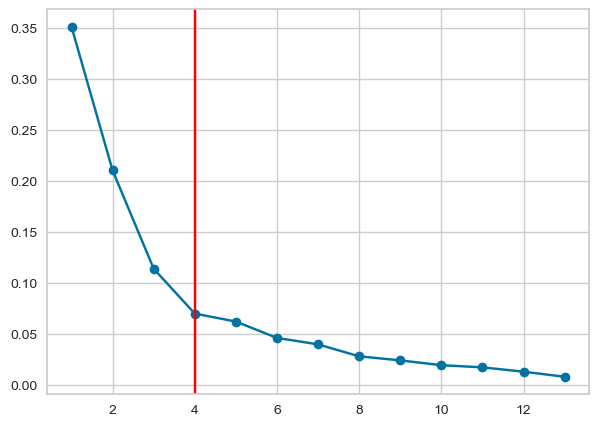

In [144]:
# Scree plot
plt.plot(np.arange(1,14),var,marker='o')
plt.axvline(x=4,color='red')
plt.show()

In [145]:
pca = PCA(n_components=8)
data_pca = pca.fit_transform(data)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7',
                                        'PC8'])

In [146]:
data_pca

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0   -3.350156 -1.474457 -0.198431  0.013188  0.274681 -0.352221  0.454845   
1   -2.263615  0.094033 -2.114921 -0.133045 -0.011339 -1.147916  0.099525   
2   -2.362854 -1.142488  1.096692  0.545426 -0.344877  0.319163  0.558113   
3   -3.581107 -2.512494 -0.057693  0.682417 -0.277391  0.167650 -0.379155   
4   -0.997288 -1.137732  2.079533 -0.488557  0.197394 -0.415051  0.451463   
..        ...       ...       ...       ...       ...       ...       ...   
173  3.003393 -2.197966 -0.346875  0.508565 -0.673280 -0.631497  0.321074   
174  2.453062 -1.964700  0.266735  0.319189  0.140748  0.193400  0.264495   
175  2.478677 -2.676602 -0.853649  0.431062  0.897899  0.282880  0.935089   
176  2.316494 -2.372787 -0.548003 -0.321368  0.520463  0.893990  1.052742   
177  2.926118 -2.680594  1.109863  0.409829 -0.998200  0.403514 -0.219727   

          PC8  
0    0.088320  
1    0.893737  
2   -0.484957  
3    0.584629  
4    0.439872  
..        ...  
173 -0.100782  
174 -0.536984  
175 -0.034357  
176  0.185445  
177 -0.027256  

[178 rows x 8 columns]

## Clustering

### K-Means

In [147]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [148]:
n_clus = [2,3,4,5,6,7,8]

In [149]:
wcss = []
for i in n_clus:
    model = KMeans(n_clusters=i)
    model.fit(data_pca)
    wcss.append(model.inertia_)

In [150]:
wcss

[1484.984437796526,
 1075.44064454182,
 979.8033820924352,
 913.2580474844139,
 850.5791313216182,
 798.5657716358467,
 756.7593424141]

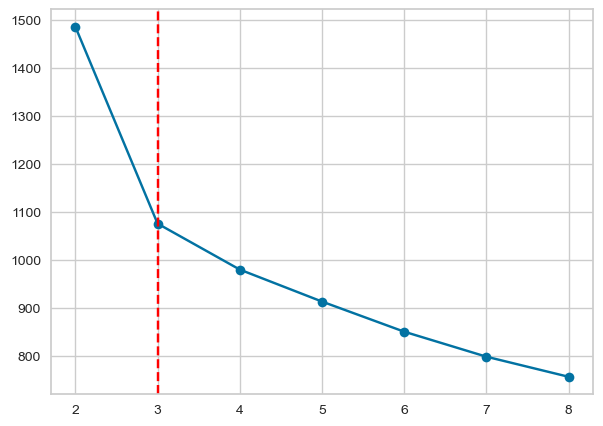

In [151]:
plt.plot(n_clus,wcss,marker='o')
plt.axvline(x=3,ls='--',color='red')

In [152]:
#pip install yellowbrick

In [153]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [154]:
k_elbow = KElbowVisualizer(KMeans(),k=8)

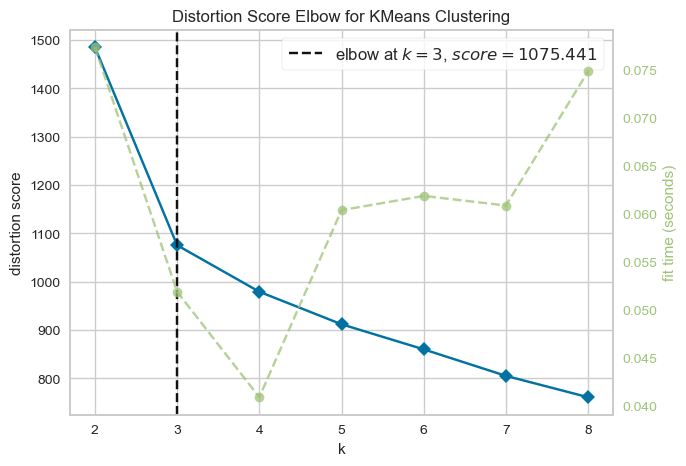

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [155]:
k_elbow.fit(data_pca)
k_elbow.show()

In [156]:
sil_score = []
for i in n_clus:
    model = KMeans(n_clusters=i)
    pred = model.fit_predict(data_pca)
    sil_score.append(silhouette_score(data_pca,pred))

In [157]:
sil_score

[0.2829552403248853,
 0.33124735450199844,
 0.31628539825588126,
 0.2928452293588345,
 0.16446681208581165,
 0.22020446918348213,
 0.16794550049983625]

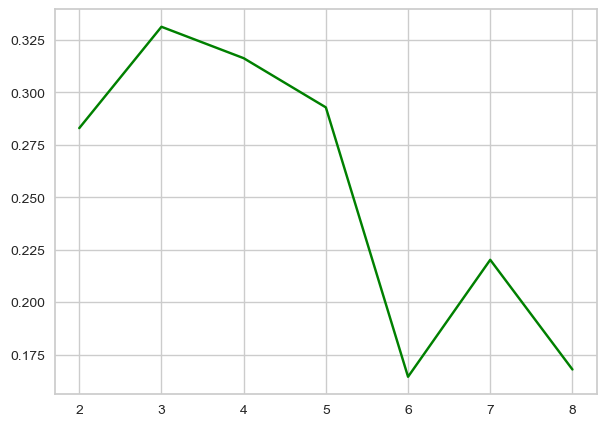

In [158]:
plt.plot(n_clus,sil_score,color='green')
plt.show()

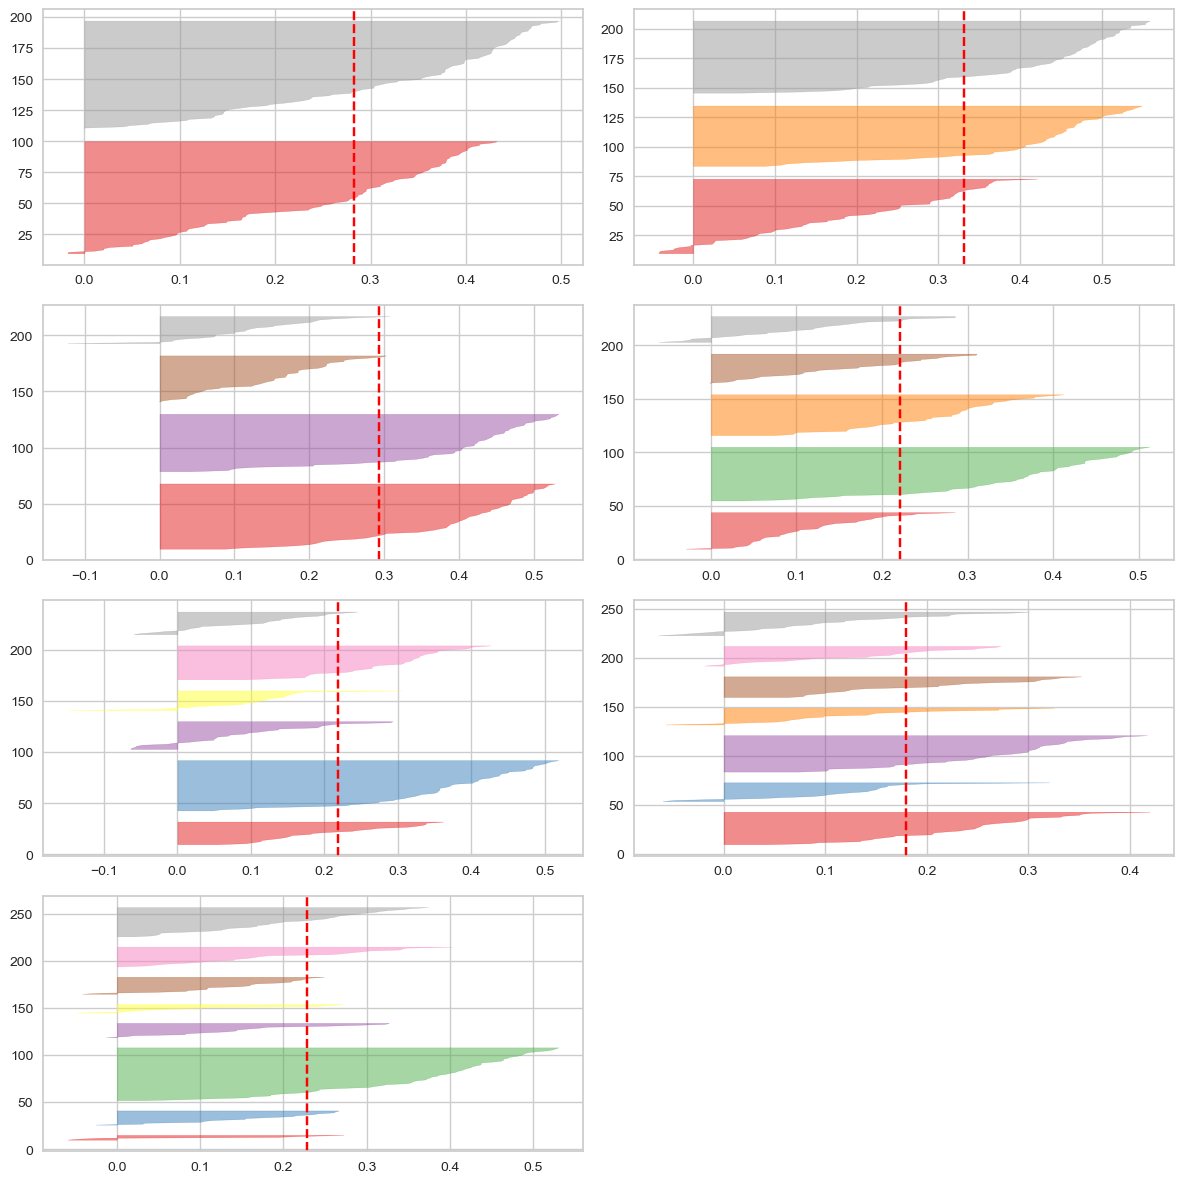

In [159]:
t = 1
plt.figure(figsize=(12,12))
for i in n_clus:
    plt.subplot(4,2,t)
    model = KMeans(n_clusters=i)
    sil_viz = SilhouetteVisualizer(model)
    sil_viz.fit(data_pca)
    t+=1
plt.tight_layout()
plt.show()

In [160]:
model_kmean = KMeans(n_clusters=3)
y_pred_kmean = model_kmean.fit_predict(data_pca)

In [161]:
data_pca['KMeans'] = y_pred_kmean

In [162]:
data_pca

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0   -3.350156 -1.474457 -0.198431  0.013188  0.274681 -0.352221  0.454845   
1   -2.263615  0.094033 -2.114921 -0.133045 -0.011339 -1.147916  0.099525   
2   -2.362854 -1.142488  1.096692  0.545426 -0.344877  0.319163  0.558113   
3   -3.581107 -2.512494 -0.057693  0.682417 -0.277391  0.167650 -0.379155   
4   -0.997288 -1.137732  2.079533 -0.488557  0.197394 -0.415051  0.451463   
..        ...       ...       ...       ...       ...       ...       ...   
173  3.003393 -2.197966 -0.346875  0.508565 -0.673280 -0.631497  0.321074   
174  2.453062 -1.964700  0.266735  0.319189  0.140748  0.193400  0.264495   
175  2.478677 -2.676602 -0.853649  0.431062  0.897899  0.282880  0.935089   
176  2.316494 -2.372787 -0.548003 -0.321368  0.520463  0.893990  1.052742   
177  2.926118 -2.680594  1.109863  0.409829 -0.998200  0.403514 -0.219727   

          PC8  KMeans  
0    0.088320       1  
1    0.893737       1  
2   -0.484957       1  
3    0.584629       1  
4    0.439872       1  
..        ...     ...  
173 -0.100782       2  
174 -0.536984       2  
175 -0.034357       2  
176  0.185445       2  
177 -0.027256       2  

[178 rows x 9 columns]

In [163]:
data_pca['KMeans'].value_counts()

0    64
1    62
2    52
Name: KMeans, dtype: int64

In [164]:
centroids = model_kmean.cluster_centers_

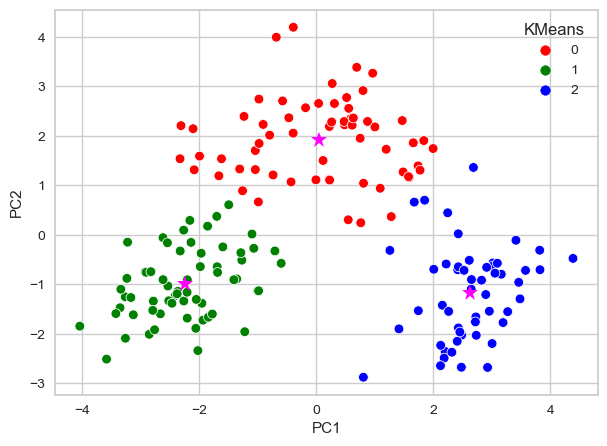

In [165]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=data_pca['PC1'],y=data_pca['PC2'],hue=data_pca['KMeans'],
                palette=['red','green','blue'])
plt.plot(centroids[0][0],centroids[0][1],marker='*',color='magenta',ms=12)
plt.plot(centroids[1][0],centroids[1][1],marker='*',color='magenta',ms=12)
plt.plot(centroids[2][0],centroids[2][1],marker='*',color='magenta',ms=12)
plt.show()

In [166]:
sil_kmeans = silhouette_score(data_pca.drop(columns=['KMeans']),y_pred_kmean)
print('Sillhoute Score:',sil_kmeans)

Sillhoute Score: 0.33124735450199844


##  Hierarchical Clustering

In [167]:
from sklearn.cluster import AgglomerativeClustering

In [168]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [169]:
dend_dist = linkage(data_pca,method='ward')

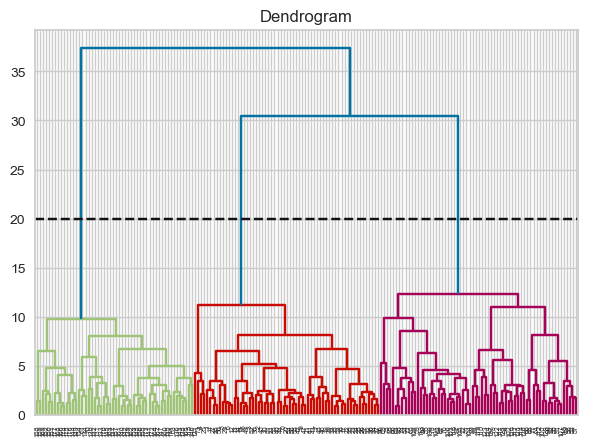

In [170]:
plt.title('Dendrogram')
dendrogram(dend_dist)
plt.axhline(y=20,ls='--',color='k')
plt.show()

In [173]:
sil_score = []
for i in n_clus:
    model = AgglomerativeClustering(n_clusters=i)
    pred = model.fit_predict(data_pca.drop(columns=['KMeans']))
    sil_score.append(silhouette_score(data_pca.drop(columns=['KMeans']),pred))

In [175]:
pd.DataFrame(sil_score,index=n_clus)

0
2  0.284481
3  0.323211
4  0.277785
5  0.234355
6  0.231418
7  0.220415
8  0.210464

In [176]:
model_agglo = AgglomerativeClustering(n_clusters=3)

In [177]:
y_pred_agglo = model_agglo.fit_predict(data_pca.drop(columns=['KMeans']))

In [178]:
y_pred_agglo

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [179]:
sil_agglo = silhouette_score(data_pca.drop(columns=['KMeans']),y_pred_agglo)

In [180]:
sil_agglo

0.3232105867346416

In [181]:
sil_kmeans

0.33124735450199844

In [182]:
data_pca['Agglo'] = y_pred_agglo

In [183]:
data_pca

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0   -3.350156 -1.474457 -0.198431  0.013188  0.274681 -0.352221  0.454845   
1   -2.263615  0.094033 -2.114921 -0.133045 -0.011339 -1.147916  0.099525   
2   -2.362854 -1.142488  1.096692  0.545426 -0.344877  0.319163  0.558113   
3   -3.581107 -2.512494 -0.057693  0.682417 -0.277391  0.167650 -0.379155   
4   -0.997288 -1.137732  2.079533 -0.488557  0.197394 -0.415051  0.451463   
..        ...       ...       ...       ...       ...       ...       ...   
173  3.003393 -2.197966 -0.346875  0.508565 -0.673280 -0.631497  0.321074   
174  2.453062 -1.964700  0.266735  0.319189  0.140748  0.193400  0.264495   
175  2.478677 -2.676602 -0.853649  0.431062  0.897899  0.282880  0.935089   
176  2.316494 -2.372787 -0.548003 -0.321368  0.520463  0.893990  1.052742   
177  2.926118 -2.680594  1.109863  0.409829 -0.998200  0.403514 -0.219727   

          PC8  KMeans  Agglo  
0    0.088320       1      2  
1    0.893737       1      2  
2   -0.484957       1      2  
3    0.584629       1      2  
4    0.439872       1      2  
..        ...     ...    ...  
173 -0.100782       2      1  
174 -0.536984       2      1  
175 -0.034357       2      1  
176  0.185445       2      1  
177 -0.027256       2      1  

[178 rows x 10 columns]

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

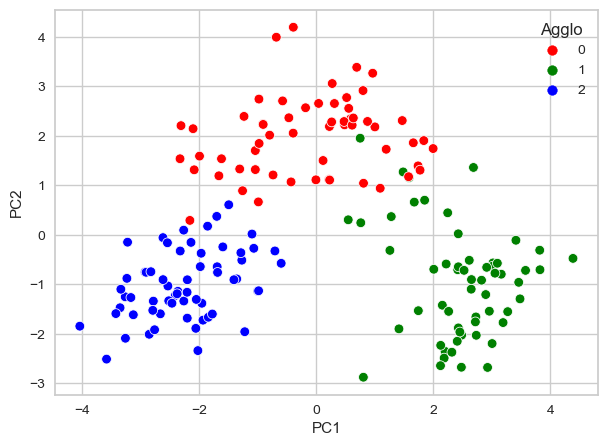

In [184]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=data_pca['PC1'],y=data_pca['PC2'],hue=data_pca['Agglo'],
                palette=['red','green','blue'])

## DBSCAN

In [190]:
df = data_pca.drop(columns=['Agglo','KMeans'])

In [185]:
from sklearn.cluster import DBSCAN

In [186]:
# Decide the epsilon and min samples

In [187]:
from sklearn.neighbors import NearestNeighbors

In [188]:
neigh = NearestNeighbors(n_neighbors=2)

In [191]:
neigh.fit(df)

NearestNeighbors(n_neighbors=2)

In [192]:
distn,index = neigh.kneighbors(df)

In [196]:
distn = np.sort(distn,axis=0)

In [199]:
distn = distn[:,1]

In [200]:
distn

array([0.84400363, 0.84400363, 0.8478165 , 0.8478165 , 0.87425548,
       0.87425548, 0.87848996, 0.87848996, 0.87931098, 0.87931098,
       0.87947177, 0.89690184, 0.89690184, 0.90945083, 0.90945083,
       0.91146377, 0.91146377, 0.91492499, 0.92128614, 0.92128614,
       0.93267938, 0.96440447, 0.98347792, 0.99715963, 0.99715963,
       1.00447089, 1.00622105, 1.00622105, 1.01455639, 1.01455639,
       1.01960502, 1.01960502, 1.02030896, 1.02030896, 1.02437443,
       1.03623488, 1.03623488, 1.04070703, 1.05534353, 1.05534353,
       1.07267872, 1.07315316, 1.08340473, 1.08508731, 1.10257432,
       1.10966917, 1.11593065, 1.12045864, 1.13457121, 1.13705089,
       1.13705089, 1.14654747, 1.14654747, 1.16457883, 1.16457883,
       1.17077506, 1.17077506, 1.18465934, 1.20649058, 1.20774065,
       1.22690756, 1.23089863, 1.23327583, 1.24059801, 1.24569654,
       1.2611307 , 1.26912094, 1.2707611 , 1.2707611 , 1.28650313,
       1.29338493, 1.30056817, 1.30056817, 1.31026507, 1.32398

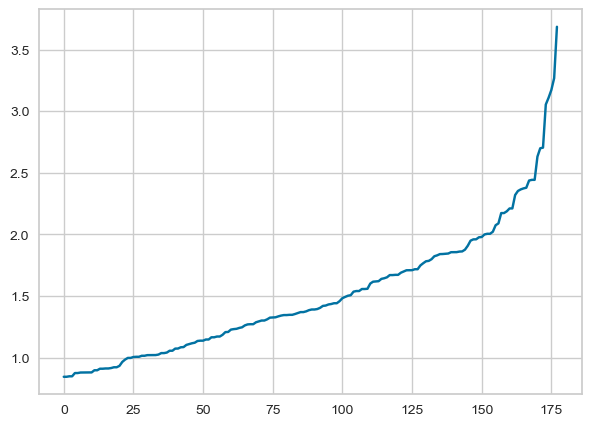

In [203]:
plt.plot(distn)
plt.show()

In [204]:
# Lets keep epsilon between 2.6, 3, 3.3
# min samples - n to (2*n)-2 (n is no of features): 8 to 14  

In [218]:

for i in range(8,15):
    for j in [3.6]:
        model = DBSCAN(eps=j,min_samples=i)
        pred = model.fit_predict(df)
        print('eps:',float(j),'\tMin Sample:',i,'\tSillhoute Score:',silhouette_score(df,pred))
    

eps: 3.6 	Min Sample: 8 	Sillhoute Score: 0.30772517523439025
eps: 3.6 	Min Sample: 9 	Sillhoute Score: 0.30772517523439025
eps: 3.6 	Min Sample: 10 	Sillhoute Score: 0.30772517523439025
eps: 3.6 	Min Sample: 11 	Sillhoute Score: 0.30772517523439025
eps: 3.6 	Min Sample: 12 	Sillhoute Score: 0.3121242621802449
eps: 3.6 	Min Sample: 13 	Sillhoute Score: 0.3121242621802449
eps: 3.6 	Min Sample: 14 	Sillhoute Score: 0.3121242621802449


In [258]:
model_dbscan = DBSCAN(eps=2.5,min_samples=4)

In [259]:
y_pred_dbscan = model_dbscan.fit_predict(df)

In [260]:
y_pred_dbscan

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0, -1,
        0,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0], dtype=int64)

In [261]:
data_pca['DBSCAN'] = y_pred_dbscan

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

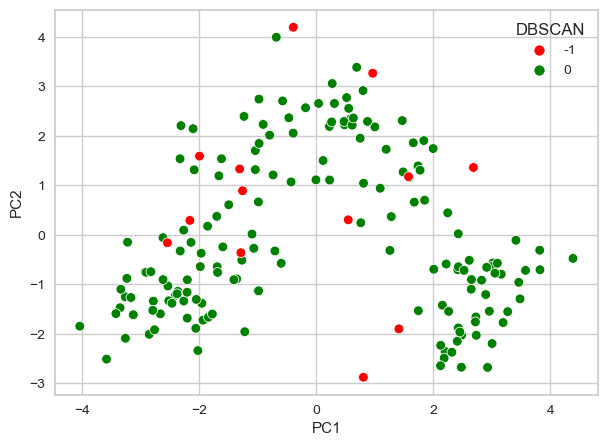

In [264]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=data_pca['PC1'],y=data_pca['PC2'],hue=data_pca['DBSCAN'],
                palette=['red','green'])

In [265]:
y_pred_kmean

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [267]:
data = pd.read_csv('wine-clustering (1).csv')

In [269]:
data['Label'] = y_pred_kmean

In [270]:
data

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     OD280  Proline  Label  
0     3.92     1065      1  
1     3.40     1050      1  
2     3.17     1185      1  
3     3.45     1480      1  
4     2.93      735      1  
..     ...      ...    ...  
173   1.74      740      2  
174   1.56      750      2  
175   1.56      835      2  
176   1.62      840      2  
177   1.60      560      2  

[178 rows x 14 columns]

In [271]:
data.groupby(by=['Label']).mean()

Alcohol  Malic_Acid       Ash  Ash_Alcanity   Magnesium  \
Label                                                              
0      12.250312    1.901875  2.231562     20.057813   92.578125   
1      13.676774    1.997903  2.466290     17.462903  107.967742   
2      13.117885    3.274615  2.413654     21.225000   98.750000   

       Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
Label                                                                     
0           2.265625    2.066094              0.357500         1.626719   
1           2.847581    3.003226              0.292097         1.922097   
2           1.672692    0.822692              0.450385         1.151923   

       Color_Intensity       Hue     OD280      Proline  
Label                                                    
0             2.971875  1.065156  2.818750   504.546875  
1             5.453548  1.065484  3.163387  1100.225806  
2             7.154231  0.696077  1.699038   623.884615

### LDA

In [272]:
data

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     OD280  Proline  Label  
0     3.92     1065      1  
1     3.40     1050      1  
2     3.17     1185      1  
3     3.45     1480      1  
4     2.93      735      1  
..     ...      ...    ...  
173   1.74      740      2  
174   1.56      750      2  
175   1.56      835      2  
176   1.62      840      2  
177   1.60      560      2  

[178 rows x 14 columns]

In [273]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [274]:
lda = LinearDiscriminantAnalysis()

In [276]:
data_lda = lda.fit_transform(data.drop(columns=['Label']),data['Label'])

In [277]:
data_lda = pd.DataFrame(data_lda,columns=['LD1','LD2'])

In [278]:
data_lda

LD1       LD2
0   -5.414866  1.807781
1   -4.092617  0.582939
2   -3.816495  1.067401
3   -5.038929  3.423086
4   -2.060332  0.586449
..        ...       ...
173  4.548217  3.074736
174  4.502719  2.061395
175  4.791023  3.444153
176  4.108611  2.818083
177  5.507832  2.788538

[178 rows x 2 columns]

In [279]:
lda.explained_variance_ratio_

array([0.76413963, 0.23586037])

In [280]:
data_lda['Labels'] = y_pred_kmean

<AxesSubplot:xlabel='LD1', ylabel='LD2'>

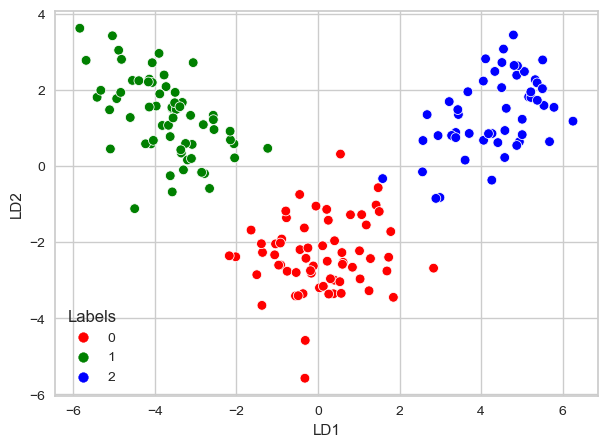

In [282]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=data_lda['LD1'],y=data_lda['LD2'],hue=data_lda['Labels'],
                palette=['red','green','blue'])